In [145]:
#Imports
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dado = pd.read_csv("graph.csv")

In [146]:
dado.head()

,vertice,adjacente,peso
0,X,A-B-C,1-2-3
1,A,B,4-1
2,B,X,5
3,C,NaN,NaN


In [147]:
#Criando grafo e adicionando vertices
graph = nx.Graph()
graph.add_nodes_from(dado.vertice)

In [148]:
for i in range(len(dado.vertice.values)):
    if pd.isnull(dado.adjacente[i]) == False:
        edges = dado.adjacente[i].split("-")
        pesos = dado.peso[i].split("-")
        for j in range(len(edges)):
            print(dado.vertice[i],edges[j],pesos[j])
            graph.add_weighted_edges_from([(dado.vertice[i],edges[j],pesos[j])]) #Arestas com pesos


X A 1
X B 2
X C 3
A B 4
B X 5


In [149]:
graph["X"]

AtlasView({'A': {'weight': '1'}, 'B': {'weight': '5'}, 'C': {'weight': '3'}})

In [150]:
edges = graph.edges
weights = [graph[u][v]['weight'] for u,v in edges]

In [151]:
for i in range(len(weights)):
    weights[i] = int(weights[i])
print(weights)

[1, 5, 3, 4]


In [152]:
edges= []
for i in graph.edges:
    edges.append(i)

In [153]:
edge_labels = {}
for i in range(len(edges)):
    edge_labels[edges[i]] = weights[i]
edge_labels

{('X', 'A'): 1, ('X', 'B'): 5, ('X', 'C'): 3, ('A', 'B'): 4}

{('X', 'A'): Text(0.4999999751630862, 0.5000000109278468, '1'),
 ('X', 'B'): Text(7.946626690014114e-09, -2.1855693665697605e-08, '5'),
 ('X', 'C'): Text(0.50000000298122, -0.49999996721645945, '3'),
 ('A', 'B'): Text(-0.50000000298122, 0.4999999672164595, '4')}

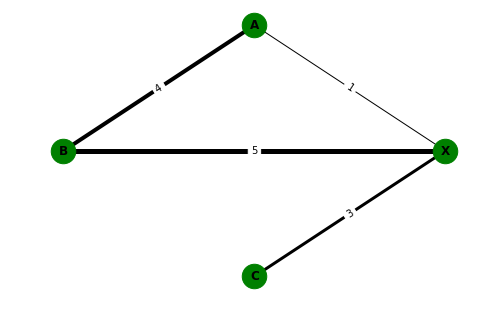

In [154]:
pos = nx.circular_layout(graph)
nx.draw(graph,pos,node_color='green',node_size=600, with_labels=True, font_weight='bold',width=weights)
edge_labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels)